In [244]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
print(plt.style.available)

['seaborn-notebook', 'seaborn-pastel', 'fivethirtyeight', 'seaborn-ticks', 'seaborn-poster', 'seaborn-deep', 'seaborn-darkgrid', 'grayscale', 'seaborn-white', 'bmh', 'seaborn-muted', 'seaborn-bright', 'seaborn-dark', 'dark_background', 'ggplot', 'seaborn-talk', 'seaborn-paper', 'seaborn-whitegrid', 'seaborn-colorblind', 'seaborn-dark-palette', 'classic']


In [245]:
LAS = pd.read_csv('/Users/matthewjorden/Documents/Well_Logs/Kansas/MAR/1045399712.csv',delim_whitespace=True)

In [246]:
LAS['SS_ex'] = 2.45
LAS['LS_ex'] = 2.71
LAS['DL_ex'] = 2.85
LAS['Salt_ex'] = 2.2


LAS['GR_Dirty'] = 110
LAS['GR_Clean'] = 20




In [247]:
LAS['DPHI'] = ((LAS['SS_ex'] - LAS['RHOB'])/(1 - LAS['SS_ex'])) * 100

In [248]:
LAS['V_Shale'] = ((LAS['GR']-LAS['GR_Clean'])/(LAS['GR_Dirty']-LAS['GR_Clean']))


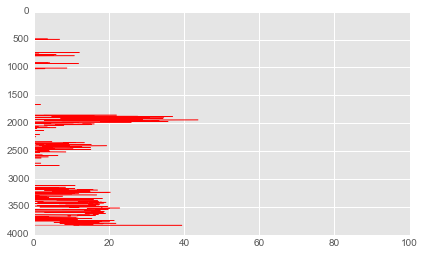

In [249]:
plt.plot(LAS['DPHI'],LAS['Depth'],color='r',linewidth=0.5)
plt.xlim(0,100)
plt.ylim(0,4000)
plt.gca().invert_yaxis()

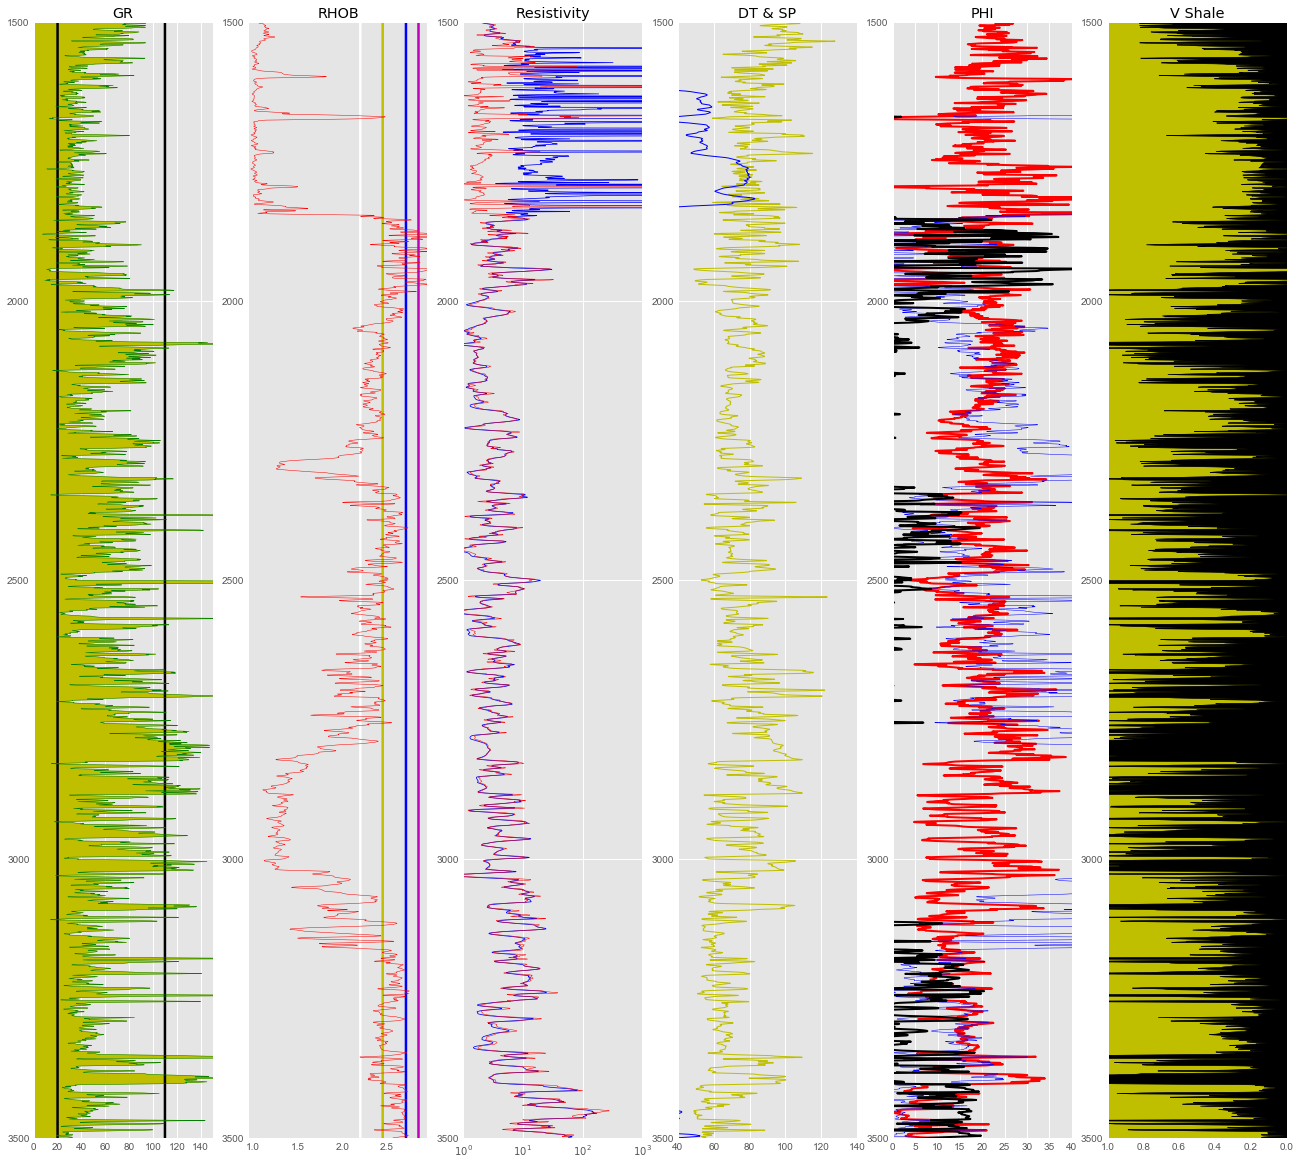

In [253]:
upper_d = 1500
lower_d = 3500


plt.figure(161,figsize=(20,20),dpi=750)



plt.subplot(161)
plt.plot(LAS['GR_Dirty'],LAS['Depth'],color='k',linewidth=2.5)
plt.xlim(0,150)
plt.ylim(upper_d,lower_d)
plt.title('GR')
plt.gca().invert_yaxis()

plt.subplot(161)
plt.plot(LAS['GR_Clean'],LAS['Depth'],color='k',linewidth=2.5)
plt.xlim(0,150)
plt.ylim(upper_d,lower_d)
plt.title('GR')
plt.gca().invert_yaxis()

plt.subplot(161)
plt.plot(LAS['GR'],LAS['Depth'],color='g',linewidth=0.5)
plt.fill_between(LAS['GR'],LAS['Depth'],  10, color='y')
plt.xlim(0,150)
plt.ylim(upper_d,lower_d)
plt.title('GR')
plt.gca().invert_yaxis()



plt.subplot(162)
plt.plot(LAS['SS_ex'],LAS['Depth'],color='y',linewidth=2.5)
plt.xlim(1.95,2.95)
plt.ylim(upper_d,lower_d)
plt.title('RHOB')
plt.gca().invert_yaxis()

plt.subplot(162)
plt.plot(LAS['LS_ex'],LAS['Depth'],color='b',linewidth=2.5)
plt.xlim(1.95,2.95)
plt.ylim(upper_d,lower_d)
plt.title('RHOB')
plt.gca().invert_yaxis()

plt.subplot(162)
plt.plot(LAS['DL_ex'],LAS['Depth'],color='m',linewidth=2.5)
plt.xlim(1.95,2.95)
plt.ylim(upper_d,lower_d)
plt.title('RHOB')
plt.gca().invert_yaxis()

plt.subplot(162)
plt.plot(LAS['Salt_ex'],LAS['Depth'],color='w',linewidth=2.5)
plt.xlim(1.95,2.95)
plt.ylim(upper_d,lower_d)
plt.title('RHOB')
plt.gca().invert_yaxis()
plt.grid(False)

plt.subplot(162)
plt.plot(LAS['RHOB'],LAS['Depth'],color='r',linewidth=0.5)
plt.xlim(0.95,2.95)
plt.ylim(upper_d,lower_d)
plt.title('RHOB')
plt.gca().invert_yaxis()



plt.subplot(163)
plt.plot(LAS['RILD'],LAS['Depth'],color='b',linewidth=0.75)
plt.xlim(1,1000)
plt.ylim(upper_d,lower_d)
plt.xscale('log')
plt.title('Resistivity')
plt.gca().invert_yaxis()

plt.subplot(163)
plt.plot(LAS['RILM'],LAS['Depth'],color='r',linewidth=0.5)
plt.xlim(1,1000)
plt.ylim(upper_d,lower_d)
plt.xscale('log')
plt.title('Resistivity')
plt.gca().invert_yaxis()



plt.subplot(164)
plt.plot(LAS['DT'],LAS['Depth'],color='y',linewidth=1)
plt.xlim(40,140)
plt.ylim(upper_d,lower_d)
plt.title('DT & SP')
plt.gca().invert_yaxis()

plt.subplot(164)
plt.plot(LAS['SP'],LAS['Depth'],color='b',linewidth=1)
plt.xlim(40,140)
plt.ylim(upper_d,lower_d)
plt.title('DT & SP')
plt.gca().invert_yaxis()



plt.subplot(165)
plt.plot(LAS['CNPOR'],LAS['Depth'],color='r',linewidth=2)
plt.title('PHI')
plt.gca().invert_yaxis()

plt.subplot(165)
plt.plot(LAS['DPOR'],LAS['Depth'],color='b',linewidth=0.5)
plt.xlim(0,40)
plt.ylim(upper_d,lower_d)
plt.gca().invert_yaxis()

plt.subplot(165)
plt.plot(LAS['DPHI'],LAS['Depth'],color='k',linewidth=2)
plt.xlim(0,40)
plt.ylim(upper_d,lower_d)
plt.gca().invert_yaxis()


plt.subplot(166, axisbg='y')
plt.plot(LAS['V_Shale'],LAS['Depth'],color='k',linewidth=0.5)
plt.fill_between(LAS['V_Shale'],LAS['Depth'],  10, color='k')
# plt.fill_between(LAS['V_Shale'],LAS['Depth'],  0, color='y')
plt.xlim(0,1)
plt.ylim(upper_d,lower_d)
plt.title('V Shale')
plt.grid(False)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()